**Question 1: Which 10 countries have the highest cumulative COVID-19 cases per 100,000 population?**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [18]:
cases_df = pd.read_csv('../../dataset/WHO-COVID-19-global-table-data.csv',index_col=False)

In [19]:
cases_df.shape

(238, 12)

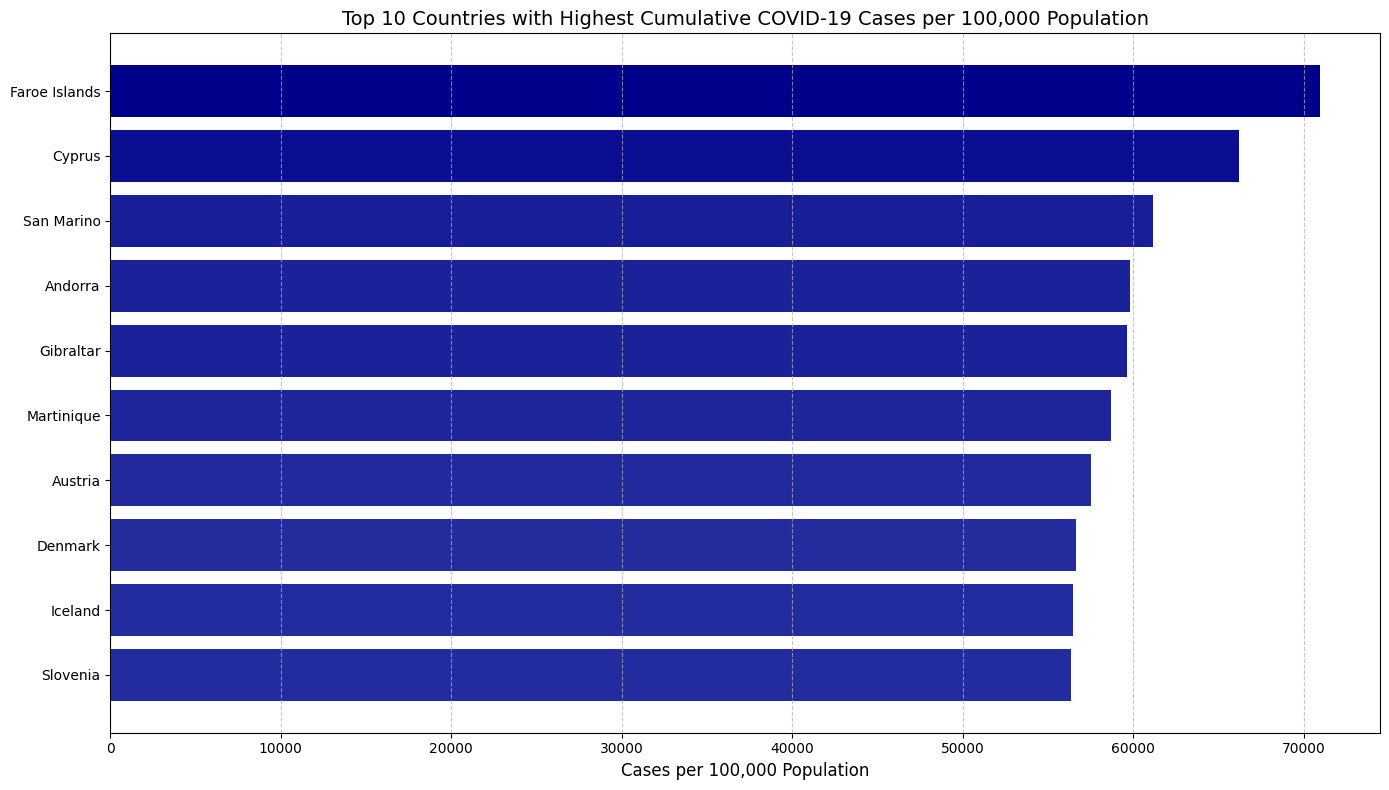

In [20]:
# Filter the dataset to obtain the top 10 countries with the highest cumulative COVID-19 cases per 100,000 population.
# Exclude the 'Global' row and remove any rows with missing values in their relevant column.
top10 = (
    cases_df[cases_df['Name'] != 'Global']  # Exclude global summary
    .dropna(subset=['Cases - cumulative total per 100000 population'])  # Remove rows with missing data
    .sort_values('Cases - cumulative total per 100000 population', ascending=False)  # Sort in descending order
    .head(10)  # Retain only the top 10 entries
)

# Define a color gradient ranging from light blue to dark blue.
cmap = LinearSegmentedColormap.from_list("blue_gradient", ["lightblue", "darkblue"])
colors = top10['Cases - cumulative total per 100000 population'] / top10['Cases - cumulative total per 100000 population'].max()
colors = cmap(colors)  # Apply gradient to each bar

# Create a horizontal bar chart representing the top 10 countries.
plt.figure(figsize=(14, 8))
bars = plt.barh(
    top10['Name'],  # Set country names along the y-axis
    top10['Cases - cumulative total per 100000 population'],  # Set cases per 100,000 on the x-axis
    color=colors  # Apply the blue gradient colors
)

# Placing axis labels and title.
plt.xlabel('Cases per 100,000 Population', fontsize=12)
plt.title('Top 10 Countries with Highest Cumulative COVID-19 Cases per 100,000 Population', fontsize=14)
# Invert the y-axis to display the country with the highest cases at the top.
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
# Save the picture.
plt.savefig('Top 10 Countries with Highest Cumulative COVID-19 Cases per 100,000 Population.png')
plt.show()
plt.close()


In [21]:
import geopandas as gpd
import geodatasets as gset
import plotly.express as px

In [22]:
import geopandas as gpd, geodatasets as gset
print("GeoPandas:", gpd.__version__)
print("geodatasets:", gset.__version__)


GeoPandas: 1.0.1
geodatasets: 2023.12.0


In [23]:
url = "../../dataset/admin_0_countries.zip"
world = gpd.read_file(url)

In [24]:
print(world.columns.tolist())  # Should include 'ADMIN', 'ISO_A3', etc.


['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

In [25]:
print(top10['Name'].tolist())

['Faroe Islands', 'Cyprus', 'San Marino', 'Andorra', 'Gibraltar', 'Martinique', 'Austria', 'Denmark', 'Iceland', 'Slovenia']


In [26]:
# Clean names for matching
world['ADMIN_clean'] = world['ADMIN'].str.lower().str.strip()
top10['Name_clean'] = top10['Name'].str.lower().str.strip()

In [27]:
print(top10['Name_clean'].tolist())

['faroe islands', 'cyprus', 'san marino', 'andorra', 'gibraltar', 'martinique', 'austria', 'denmark', 'iceland', 'slovenia']


In [ ]:
# Plot choropleth map with scatter points for top 10
fig = px.scatter_geo(
    merged,
    lat='LAT',
    lon='LON',
    size='Cases_per_100k',  # optional: scale bubble by cases
    color='Cases_per_100k',
    hover_name='Name',
    color_continuous_scale='Reds',
    projection="natural earth",
    title='Top 10 Countries with Highest COVID-19 Cases per 100,000 Population'
)

fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="LightGray"
    ),
    width=1200,   # Set the width of the figure
    height=700,   # Set the height of the figure
    title=dict(
        text='Top 10 Countries with Highest COVID-19 Cases per 100,000 Population',
        x=0.5,      # Center the title
        xanchor='center'
    )
)
fig.write_html("top10_covid_map.html")
fig.show()